In [ ]:
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(os.path.join(notebook_dir, "."))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from report_config import ReportConfig

In [ ]:
reviews_df = pd.read_csv("../glassdoor_reviews_predicted.csv")

In [3]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",2023-12-15,5.0,1,0,1
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,2023-12-15,5.0,0,1,0
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,2023-03-11,4.0,1,0,1
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,2023-03-11,4.0,-1,0,2
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,2022-02-24,1.0,0,1,0


In [4]:
reviews_df["review_datetime"] = pd.to_datetime(
    reviews_df["review_date"], format="%Y-%m-%d"
)

In [5]:
reviews_df["year"] = reviews_df["review_datetime"].dt.year

In [6]:
reviews_df.head(2)

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,review_datetime,year
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",2023-12-15,5.0,1,0,1,2023-12-15,2023
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,2023-12-15,5.0,0,1,0,2023-12-15,2023


In [7]:
reviews_df["review_datetime"].min()

Timestamp('2014-10-05 00:00:00')

In [8]:
reviews_df["review_datetime"].max()

Timestamp('2024-03-16 00:00:00')

In [9]:
sentiment_counts = (
    reviews_df.groupby(["year", "predicted_sentiment"])
    .size()
    .reset_index(name="count")
)

In [10]:
len(reviews_df.loc[(reviews_df["year"] == 2015) & (reviews_df["predicted_sentiment"] == 1)])

76

In [11]:
sentiment_counts.head()

,year,predicted_sentiment,count
0,2014,0,2
1,2014,1,13
2,2014,2,9
3,2015,0,6
4,2015,1,76


c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to p

[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


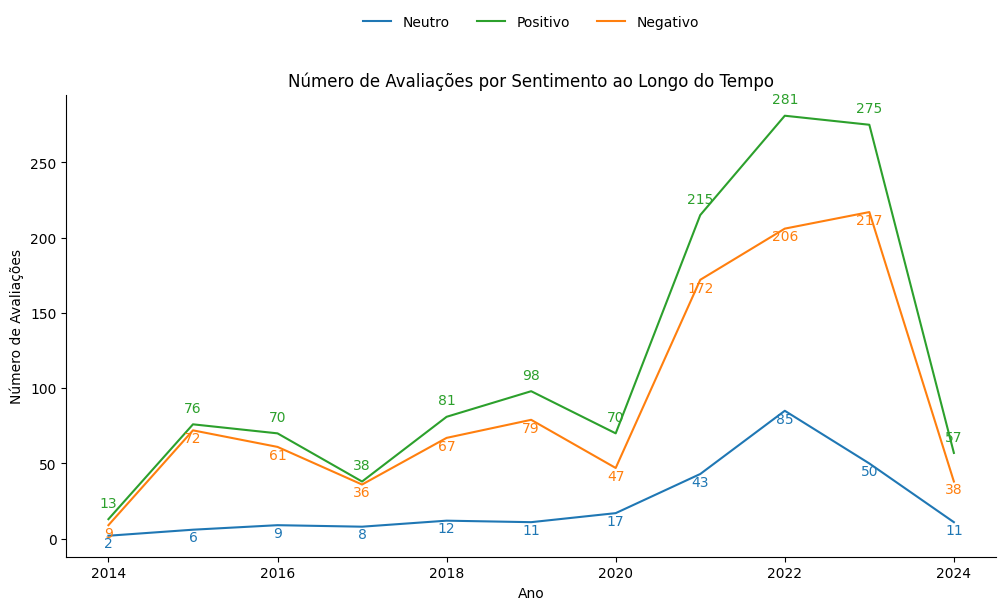

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 6))
sns.lineplot(
    data=sentiment_counts,
    x="year",
    y="count",
    hue="predicted_sentiment",
    palette=ReportConfig.SENTIMENT_PALETTE,
    ax=ax,
)

# Get unique years
years = sentiment_counts["year"].unique()
print(years)

# Annotations for number of reviews per sentiment
for year in years:
    year_counts = sentiment_counts[sentiment_counts["year"] == year]["count"].tolist()

    neutral_counts, positive_counts, negative_counts = year_counts

    ax.text(
        x=year,
        y=neutral_counts - 8,
        s=f"{neutral_counts}",
        ha="center",
        color=ReportConfig.NEUTRAL_SENTIMENT_COLOR,
    )

    ax.text(
        x=year,
        y=positive_counts + 8,
        s=f"{positive_counts}",
        ha="center",
        color=ReportConfig.POSITIVE_SENTIMENT_COLOR,
    )

    ax.text(
        x=year,
        y=negative_counts - 8,
        s=f"{negative_counts}",
        ha="center",
        color=ReportConfig.NEGATIVE_SENTIMENT_COLOR,
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

plt.xlabel("Ano")
plt.ylabel("Número de Avaliações")
plt.title("Número de Avaliações por Sentimento ao Longo do Tempo")

handles, labels = ax.get_legend_handles_labels()
for i in range(len(ReportConfig.SENTIMENT_DICT)):
    handles[i]._label = ReportConfig.SENTIMENT_DICT[int(labels[i])]

plt.legend(
    # title="Sentimento",
    bbox_to_anchor=(0.5, 1.2),
    loc="upper center",
    edgecolor="1",
    ncols=3,
)

plt.show()